In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re

import grakel as gk


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
import MMDforGraphs as mg
importlib.reload(sys.modules['MMDforGraphs'])
import myKernels.WWL as wl

In [4]:
keys = ['probs_1', 'probs_2', 'sizes_1','sizes_2', 'n', 'm', 'noise', 'mean11', 'mean12', 'mean13', 'mean21', 'mean22', 'mean23']
params_kernel = {}
data_auc = {}
data = {}

# GH


In [7]:
data['GH'] = readfoldertopanda("../data/SBMAttributeNormal/GH")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
data['GH'].columns

Index(['kernel', 'alpha', 'normalize', 'probs_1', 'probs_2', 'sizes_1',
       'sizes_2', 'nr_nodes_1', 'nr_nodes_2', 'mean11', 'mean12', 'mean13',
       'mean21', 'mean22', 'mean23', 'm3_diff', 'n', 'm', 'timestap', 'B', 'N',
       'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree',
       'with_labels', 'type', 'mu'],
      dtype='object')

In [33]:
ok = np.unique(data['GH']['mu'])
ok

array([0.1, 0.5, 1. , ..., nan, nan, nan])

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


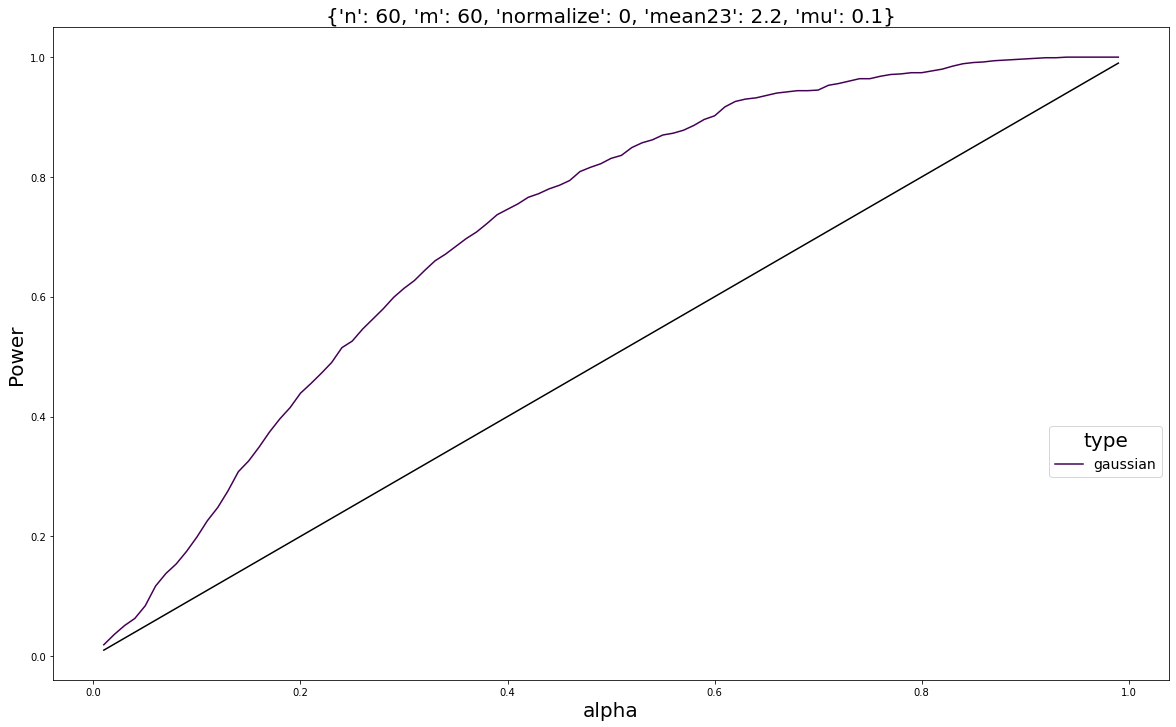

In [35]:
params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'mean23':2.2,
                #'type':'gaussian'
                'mu':0.1
                }


plotVaryingBGDEG(df = data['GH'].copy(), param_vary_name = "type", params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "viridis")


# PROP

Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'mean11',
       'mean12', 'mean13', 'mean21', 'mean22', 'mean23', 'm3_diff', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'w', 'tmax', 'M'],
      dtype='object')
['L2']


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


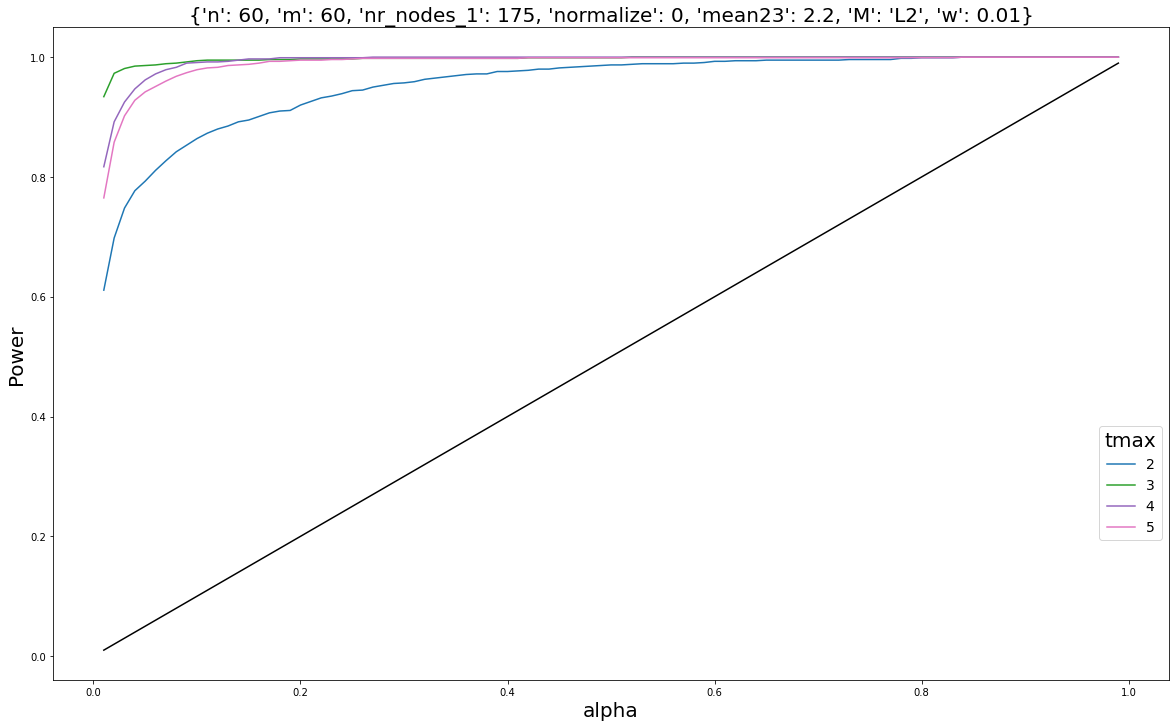

In [39]:
# Propagation
name = 'PROP'
data[name] = readfoldertopanda(f"../data/SBMAttributeNormal/{name}")
print(data[name].columns)
print(np.unique(data['PROP']['M']))


params_fixed = {'n':60,
                'm':60,
                'nr_nodes_1':175,
                'normalize':0,
                'mean23':2.2,
                'M':'L2',
                'w':0.01
                #'tmax':4
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'tmax', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "tab10")



# HASH

Index(['kernel', 'alpha', 'normalize', 'probs_1', 'probs_2', 'sizes_1',
       'sizes_2', 'nr_nodes_1', 'nr_nodes_2', 'mean11', 'mean12', 'mean13',
       'mean21', 'mean22', 'mean23', 'm3_diff', 'n', 'm', 'timestap', 'B', 'N',
       'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree',
       'nitr', 'with_labels', 'w', 'iterations', 'scale', 'basekernel',
       'sigma'],
      dtype='object')
[2 4 6]


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


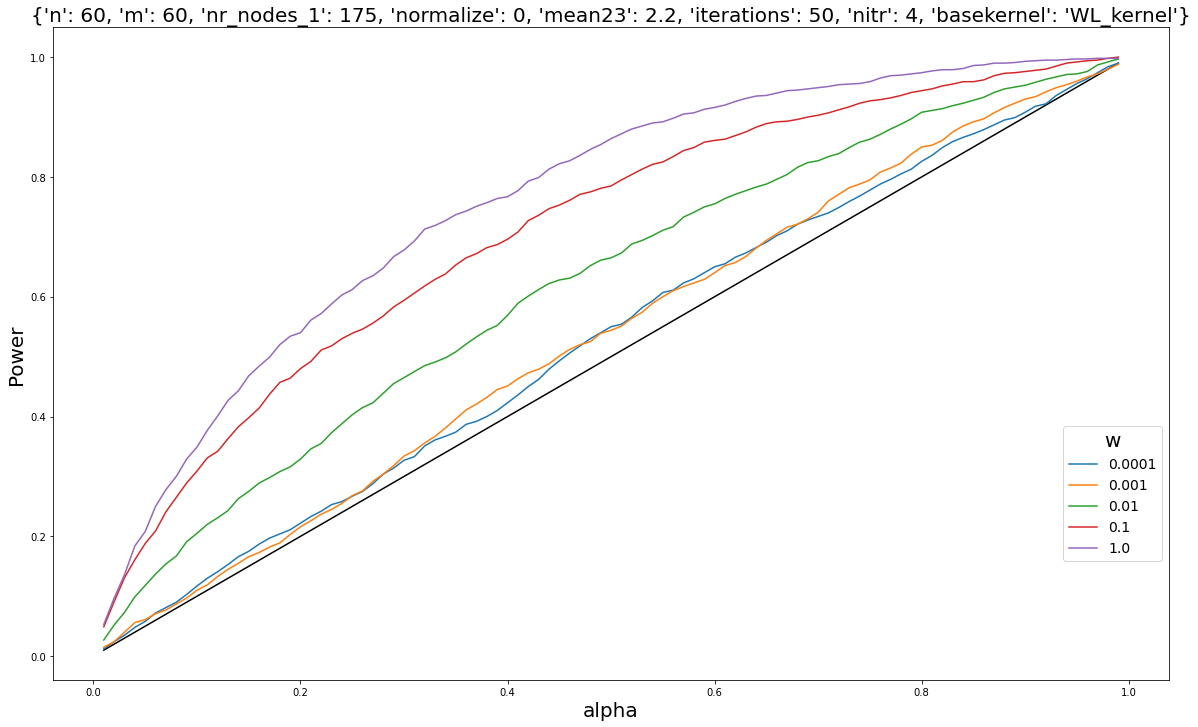

In [57]:
# Propagation
name = 'HASH'
data[name] = readfoldertopanda(f"../data/SBMAttributeNormal/{name}")
print(data[name].columns)
print(np.unique(data['HASH']['nitr']))


params_fixed = {'n':60,
                'm':60,
                'nr_nodes_1':175,
                'normalize':0,
                'mean23':2.2,
                #'w':1,
                'iterations': 50,
                'nitr':4,
                'basekernel':'WL_kernel'
                }


plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'w', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "tab10")

